# Coding Assignment

## Question 1

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import functions as f
import functions_mychange as func
%load_ext autoreload

file = Path.cwd().joinpath('HW2_data.csv') # concatenates HW2_data.csv to the current folder that should be the extracted zip folder 
dataset = pd.read_csv(file)  # load the data and drop the first row that was filled with nans
features = ['Age', 'Gender', 'Increased Urination', 'Increased Thirst','Sudden Weight Loss',
                       'Weakness','Increased Hunger','Genital Thrush','Visual Blurring','Itching','Irritability',
                       'Delayed Healing','Partial Paresis','Muscle Stiffness','Hair Loss','Obesity','Diagnosis','Family History']

random.seed(149) #our random seed
dataset.head(10) #visualise file

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
0,45,Male,No,No,No,Yes,No,No,No,Yes,No,No,Yes,No,Yes,No,Negative,0
1,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Negative,0
2,45,Male,Yes,Yes,No,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No,Positive,0
3,59,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Positive,1
4,40,Female,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Positive,0
5,72,Male,Yes,No,No,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative,0
6,43,Male,No,No,No,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,No,Negative,1
7,57,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No,No,Positive,0
8,37,Male,No,No,No,Yes,No,No,No,No,No,Yes,No,No,Yes,No,Positive,1
9,56,Male,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Positive,1


In [2]:
dataset = dataset.interpolate()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  565 non-null    int64 
 1   Gender               565 non-null    object
 2   Increased Urination  565 non-null    object
 3   Increased Thirst     545 non-null    object
 4   Sudden Weight Loss   556 non-null    object
 5   Weakness             565 non-null    object
 6   Increased Hunger     552 non-null    object
 7   Genital Thrush       551 non-null    object
 8   Visual Blurring      565 non-null    object
 9   Itching              554 non-null    object
 10  Irritability         565 non-null    object
 11  Delayed Healing      565 non-null    object
 12  Partial Paresis      565 non-null    object
 13  Muscle Stiffness     550 non-null    object
 14  Hair Loss            565 non-null    object
 15  Obesity              565 non-null    object
 16  Diagnosi

In [3]:
# Here we check percent of NaNs in the dataset:
df = dataset.copy()
df = df.replace('Female',0).replace('Male',1).replace('No',0).replace('Yes',1).replace('Positive',1).replace('Negative',0)
isna = np.zeros(len(df.keys()))
percent_nan = np.zeros(len(df.keys()))
for i,feat in enumerate(df.keys()):
    isna[i] = df[feat].isna().sum()
    percent_nan[i] = 100*(isna[i]/len(df[feat]))
    print('NAN pecent in feature {}  =  {:.02f}%'.format(feat,percent_nan[i]))

NAN pecent in feature Age  =  0.00%
NAN pecent in feature Gender  =  0.00%
NAN pecent in feature Increased Urination  =  0.00%
NAN pecent in feature Increased Thirst  =  3.54%
NAN pecent in feature Sudden Weight Loss  =  1.59%
NAN pecent in feature Weakness  =  0.00%
NAN pecent in feature Increased Hunger  =  2.30%
NAN pecent in feature Genital Thrush  =  2.48%
NAN pecent in feature Visual Blurring  =  0.00%
NAN pecent in feature Itching  =  1.95%
NAN pecent in feature Irritability  =  0.00%
NAN pecent in feature Delayed Healing  =  0.00%
NAN pecent in feature Partial Paresis  =  0.00%
NAN pecent in feature Muscle Stiffness  =  2.65%
NAN pecent in feature Hair Loss  =  0.00%
NAN pecent in feature Obesity  =  0.00%
NAN pecent in feature Diagnosis  =  0.00%
NAN pecent in feature Family History  =  0.00%


We see that NaNs' percent is small so we can drop tha data and it wilך hardly affect results/perfomance

In [4]:
def make_data_binary(data):
    binary = data.copy()
    ''' 
    We have changed the values from string to the binary ones, it will be easier for us 
    to work with the data.
    Female = 0, Male = 1.
    Yes = 1, No = 0
    Positive = 1, Negative = 0
    '''
    binary = binary.replace('Female',0).replace('Male',1).replace('No',0).replace('Yes',1).replace('Positive',1).replace('Negative',0)
    return binary.dropna() #we see in the data we have nan values. We have dropped them.

data = make_data_binary(dataset)
diag_state = data[["Diagnosis"]]
data.head(10) #visualize data after binarization

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
0,45,1,0,0.0,0.0,1,0.0,0.0,0,1.0,0,0,1,0.0,1,0,0,0
1,42,1,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0.0,1,0,0,0
2,45,1,1,1.0,0.0,1,0.0,1.0,0,0.0,0,1,0,0.0,1,0,1,0
3,59,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0.0,0,0,1,1
4,40,0,1,1.0,1.0,1,0.0,0.0,1,1.0,0,0,1,1.0,0,0,1,0
5,72,1,1,0.0,0.0,0,1.0,0.0,1,1.0,0,1,1,1.0,1,0,0,0
6,43,1,0,0.0,0.0,1,0.0,1.0,0,1.0,0,1,0,0.0,1,0,0,1
7,57,1,1,1.0,1.0,1,1.0,0.0,1,0.0,0,0,1,0.0,0,0,1,0
8,37,1,0,0.0,0.0,1,0.0,0.0,0,0.0,0,1,0,0.0,1,0,1,1
9,56,1,1,0.0,1.0,1,0.0,1.0,0,1.0,1,0,0,0.0,1,0,1,1


## Question 2

In [5]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

orig_feat = data.columns.values.tolist()
orig_feat.remove('Diagnosis')
X_train, X_test, y_train, y_test = train_test_split(data, np.ravel(diag_state), test_size=0.2, random_state=10, stratify=np.ravel(diag_state)) #we use stratify to save proportion of classes in the train and test sets  

## Question 3

In [6]:
# a
percent_train,feat = f.find_distribution(X_train,features)
percent_test,_ = f.find_distribution(X_test,features)
delta = -(percent_test-percent_train)
a = np.array([percent_train,percent_test,delta]).T

distribution = pd.DataFrame(a,columns = ['Train%','Test%','Delta%'], index = feat )
distribution.head(16)

,Train%,Test%,Delta%
Gender,61.483254,69.523810,-8.040556
Increased Urination,50.478469,45.714286,4.764183
Increased Thirst,46.172249,38.095238,8.077011
Sudden Weight Loss,41.626794,40.952381,0.674413
Weakness,58.133971,60.000000,-1.866029
Increased Hunger,46.650718,40.952381,5.698337
Genital Thrush,20.334928,29.523810,-9.188881
Visual Blurring,45.933014,39.047619,6.885395
Itching,49.521531,44.761905,4.759626
Irritability,24.641148,22.857143,1.784005


ai. If the data is not balanced, regular splitting the data to train and test can lead to imbalance of features between train and test.

aii. To solve the issue we need to use "stratify" that save proportion of classes during splitting to train and test sets.

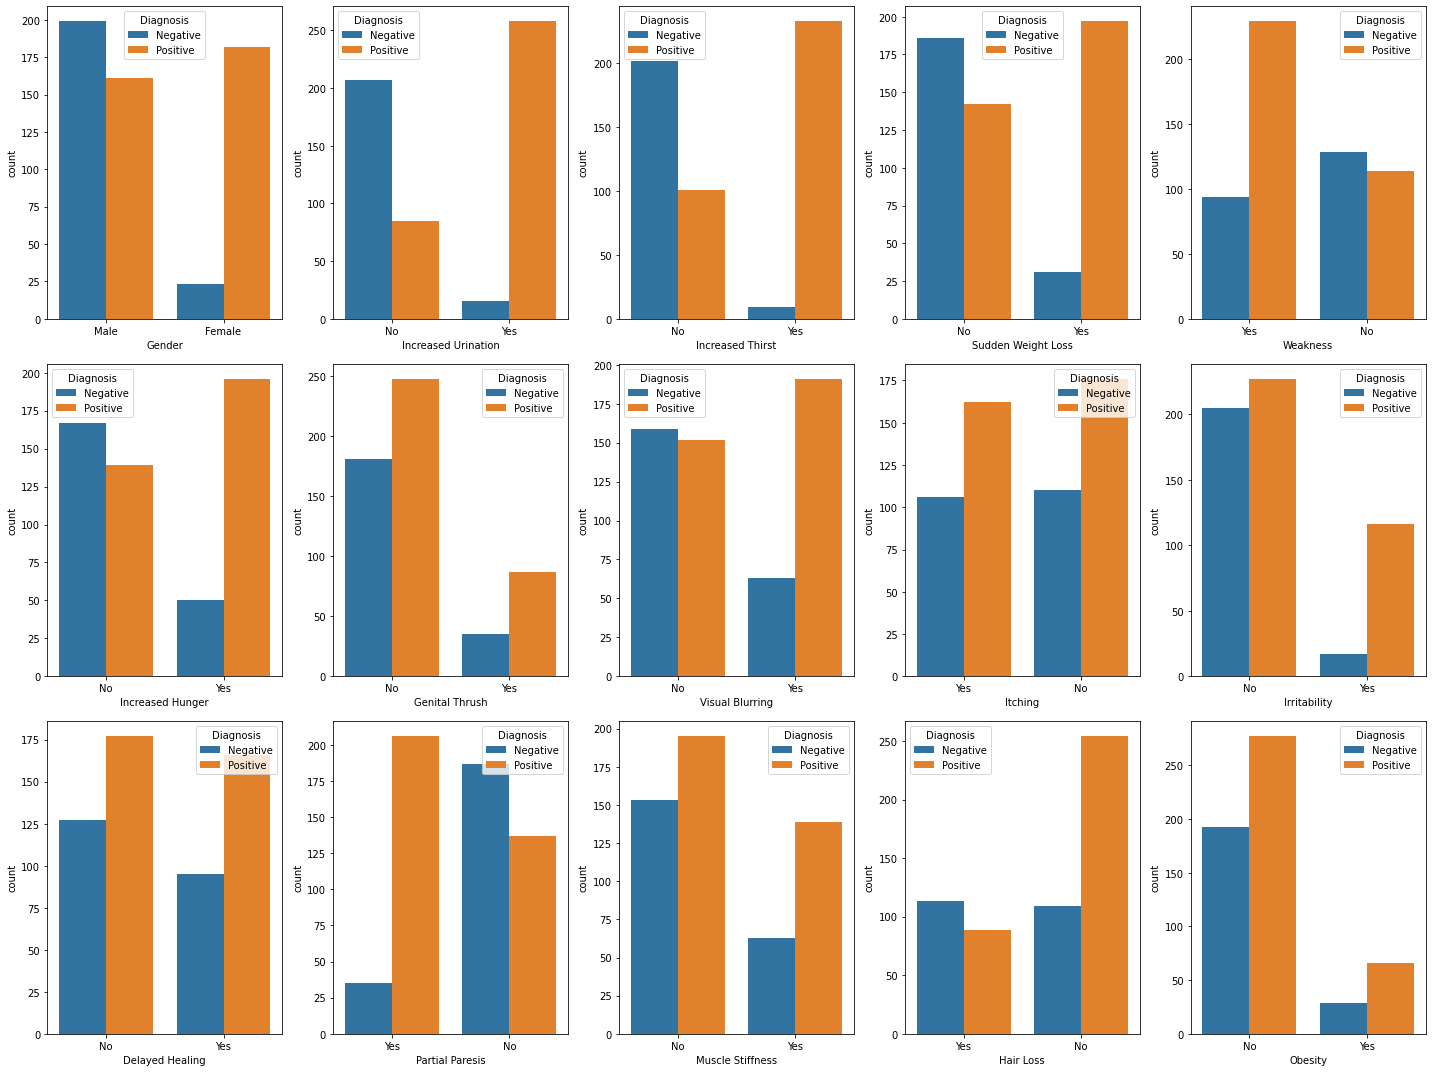

In [7]:
# b
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3,5, figsize=(20,15))
axs = axs.ravel()
for i, feat in enumerate(dataset.keys()):
    if feat== 'Age' or feat =='Diagnosis' or feat == 'Family History': 
        continue
    sns.countplot(x = dataset[feat], hue = dataset['Diagnosis'], ax = axs[i-1])
plt.tight_layout()
plt.show()

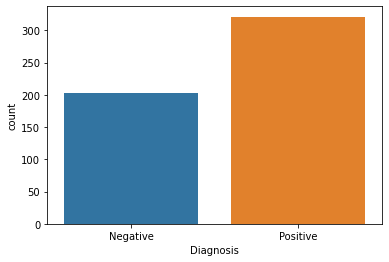

Negative samples account for 38.62% of the data.
Positive samples account for 61.38% of the data.


In [8]:
# c


g = sns.countplot(x = 'Diagnosis', data = diag_state)
g.set(xticklabels=['Negative','Positive'])
plt.show()
idx_1 = (diag_state == 1).index[(diag_state == 1)['Diagnosis'] == True].tolist() # positive
idx_2 = (diag_state == 0).index[(diag_state == 0)['Diagnosis'] == True].tolist() # negative
print("Negative samples account for " + str("{0:.2f}".format(100 * len(idx_2) / len(diag_state))) + "% of the data.")
print("Positive samples account for " + str("{0:.2f}".format(100 * len(idx_1) / len(diag_state))) + "% of the data.")

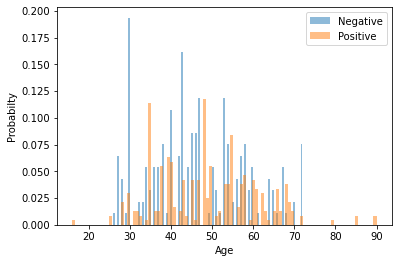

In [9]:
bins = 100
feat = 'Age'
plt.hist(dataset[feat].loc[idx_2], bins, density=True, alpha=0.5, label='Negative')
plt.hist(dataset[feat].loc[idx_1], bins, density=True, alpha=0.5, label='Positive')
plt.xlabel('Age')
plt.ylabel('Probabilty')
plt.legend(loc='upper right')
plt.show()

C:\Anaconda3\envs\bm-336546-hw2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\envs\bm-336546-hw2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\envs\bm-336546-hw2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

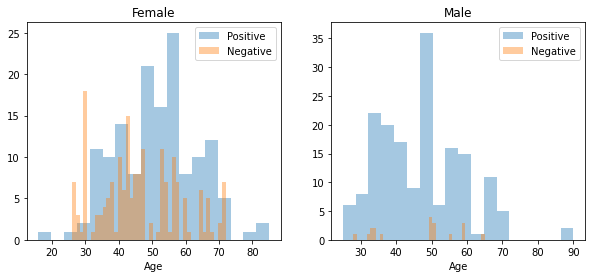

In [10]:
Positive = 'Positive'
Negative = 'Negative'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = data[data['Gender']==1]
men = data[data['Gender']==0]
ax = sns.distplot(women[women['Diagnosis']==1].Age.dropna(), bins=18, label = Positive, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Diagnosis']==0].Age.dropna(), bins=40, label = Negative, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Diagnosis']==1].Age.dropna(), bins=18, label = Positive, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Diagnosis']==0].Age.dropna(), bins=40, label = Negative, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

C:\Anaconda3\envs\bm-336546-hw2\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


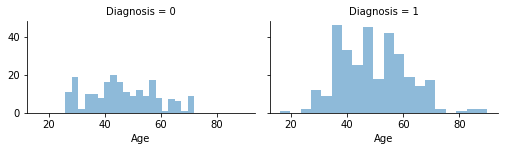

In [11]:
grid = sns.FacetGrid(data, col='Diagnosis', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\Anaconda3\envs\bm-336546-hw2\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


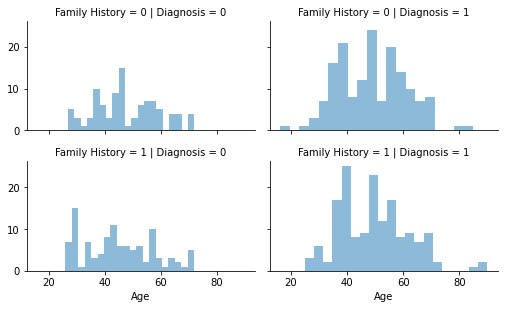

In [12]:
grid = sns.FacetGrid(data, col='Diagnosis', row='Family History', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

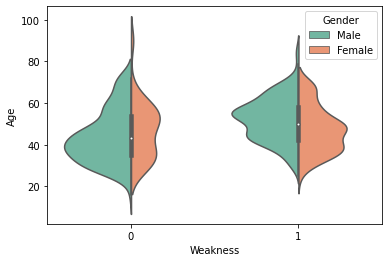

In [13]:
ax = sns.violinplot(x=data['Weakness'], y=data['Age'], hue="Gender",
                    data=dataset, palette="Set2", split=True,
                    scale="count")

d. 
i. There are few negative samples of female in the data and number of positive samples of female in the dataset is bigger than number of positive samples of men, but we found in the internet that more men suffer from the Type 1 Diabetes. Moreover distribution of ages of the negative patienst is smaller than one of the positive patients. 

d.ii. There are features like Increased urination and Increased thirst that have separation (not 100%) between positive and negative diagnoses. For example if "Increased urination" = Yes the probability to get positive doagnosis much bigger than probability to get negative diagnosis and vice versa.   

## Question 4

In [14]:
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# instantiate OneHotEncoder
ohe = OneHotEncoder( sparse=False ) 
d = dataset.dropna().copy() #drop nan's from the dataset
# apply OneHotEncoder on categorical feature columns and drop Age and Diagnosis
X_ohe = ohe.fit_transform(d.drop('Age', axis=1).drop('Diagnosis', axis=1)) 
X_ohe.shape

(523, 32)

In [15]:
d['Diagnosis'].shape

(523,)

In [16]:
# Here we add Age to one hot vector
dd = dataset.dropna()['Age'].values
dd = np.reshape(dd,(1, dd.size))
X_ohe = np.concatenate((dd.T,X_ohe), axis = 1)
X_ohe.shape

(523, 33)

In [17]:
# Here we do scaling on the age
Age =  X_ohe[:,0]
mu = np.mean(Age)
std = np.std(Age)
Age -=mu
Age/=std
age = np.array([Age])
X2 = np.concatenate((age.T, X_ohe[:,1:-1]),axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, d['Diagnosis'], test_size=0.2, random_state=10, stratify =d['Diagnosis'] )                                                   

In [19]:
# from tutorial 5
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold as SKFold
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=5,solver='saga', multi_class='ovr', max_iter=10000)
lmbda = np.array([0.01, 0.01, 1, 10, 100, 1000])
kf = SKFold(n_splits=5)
pipe_lin = Pipeline(steps=[('logistic', logreg)])
clf = GridSearchCV(estimator=pipe_lin, param_grid={'logistic__C': 1/lmbda, 'logistic__penalty': ['l2', 'l1']},
                   scoring=['roc_auc'], cv=kf,
                   refit='roc_auc', verbose=3, return_train_score=True) # verbose bigger - more data we see, logistic__C - do logistiq regression with parameter C
clf.fit(X_train, y_train)
clf.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END logistic__C=100.0, logistic__penalty=l2; roc_auc: (train=0.984, test=0.992) total time=   0.0s
[CV 2/5] END logistic__C=100.0, logistic__penalty=l2; roc_auc: (train=0.993, test=0.944) total time=   0.0s
[CV 3/5] END logistic__C=100.0, logistic__penalty=l2; roc_auc: (train=0.987, test=0.978) total time=   0.0s
[CV 4/5] END logistic__C=100.0, logistic__penalty=l2; roc_auc: (train=0.987, test=0.988) total time=   0.0s
[CV 5/5] END logistic__C=100.0, logistic__penalty=l2; roc_auc: (train=0.987, test=0.974) total time=   0.0s
[CV 1/5] END logistic__C=100.0, logistic__penalty=l1; roc_auc: (train=0.984, test=0.991) total time=   0.1s
[CV 2/5] END logistic__C=100.0, logistic__penalty=l1; roc_auc: (train=0.993, test=0.945) total time=   0.1s
[CV 3/5] END logistic__C=100.0, logistic__penalty=l1; roc_auc: (train=0.987, test=0.979) total time=   0.0s
[CV 4/5] END logistic__C=100.0, logistic__penalty=l1; roc_auc: (train=0.987

{'logistic__C': 1.0, 'logistic__penalty': 'l1'}

In [20]:
best_logreg = clf.best_estimator_

In [21]:
print('For the test set:\n')
func.calc_stat(X_test,y_test,best_logreg, flag = 'log') # calculate performance of test
print('\nFor the train set:\n')
func.calc_stat(X_train,y_train,best_logreg,flag ='log') # calculate performance of train

For the test set:

Loss is 0.25. 
Accuracy is 0.90. 
F1 is 0.92. 
AUROC is 0.954

For the train set:

Loss is 0.16. 
Accuracy is 0.93. 
F1 is 0.94. 
AUROC is 0.986


In [22]:
C = [0.001, 0.01, 0.1, 1, 10, 100]
gamma = [0];
best_svm_lin = func.cv_kfold_svm(X_train,y_train,C=C,K=5,gamma=gamma, flag = 'linear')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END svm__C=0.001, svm__kernel=linear; roc_auc: (train=0.954, test=0.983) total time=   0.0s
[CV 2/5] END svm__C=0.001, svm__kernel=linear; roc_auc: (train=0.969, test=0.925) total time=   0.0s
[CV 3/5] END svm__C=0.001, svm__kernel=linear; roc_auc: (train=0.956, test=0.938) total time=   0.0s
[CV 4/5] END svm__C=0.001, svm__kernel=linear; roc_auc: (train=0.954, test=0.987) total time=   0.0s
[CV 5/5] END svm__C=0.001, svm__kernel=linear; roc_auc: (train=0.959, test=0.936) total time=   0.0s
[CV 1/5] END svm__C=0.01, svm__kernel=linear; roc_auc: (train=0.968, test=0.995) total time=   0.0s
[CV 2/5] END svm__C=0.01, svm__kernel=linear; roc_auc: (train=0.978, test=0.934) total time=   0.0s
[CV 3/5] END svm__C=0.01, svm__kernel=linear; roc_auc: (train=0.975, test=0.968) total time=   0.0s
[CV 4/5] END svm__C=0.01, svm__kernel=linear; roc_auc: (train=0.969, test=0.987) total time=   0.0s
[CV 5/5] END svm__C=0.01, svm__kern

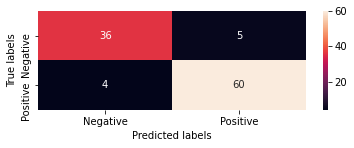

In [23]:
y_pred_svm_lin_best =  best_svm_lin.predict(X_test)
y_pred_proba_svm_lin_best = best_svm_lin.predict_proba(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm_lin_best)
ax1 = plt.subplot(211)
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()


In [24]:
print('For the test set:\n')
func.calc_stat(X_test,y_test,best_svm_lin, flag = 'non_log') # calculate performance of test
print('\nFor the train set:\n')
func.calc_stat(X_train,y_train,best_svm_lin,flag ='non_log') # calculate performance of train

For the test set:

Loss is 0.17. 
Accuracy is 0.91. 
F1 is 0.93. 
AUROC is 0.968

For the train set:

Loss is 0.11. 
Accuracy is 0.94. 
F1 is 0.95. 
AUROC is 0.980


In [25]:
C = [0.001, 0.01, 0.1, 1, 10, 100]
gamma = [0.001,0.01, 0.1, 1, 10, 100]
best_svm_rbf = func.cv_kfold_svm(X_train,y_train,C=C,K=5,gamma=gamma, flag = 'rbf')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END svm__C=0.001, svm__gamma=0.001, svm__kernel=rbf; roc_auc: (train=0.957, test=0.985) total time=   0.0s
[CV 2/5] END svm__C=0.001, svm__gamma=0.001, svm__kernel=rbf; roc_auc: (train=0.970, test=0.928) total time=   0.0s
[CV 3/5] END svm__C=0.001, svm__gamma=0.001, svm__kernel=rbf; roc_auc: (train=0.962, test=0.947) total time=   0.0s
[CV 4/5] END svm__C=0.001, svm__gamma=0.001, svm__kernel=rbf; roc_auc: (train=0.957, test=0.988) total time=   0.0s
[CV 5/5] END svm__C=0.001, svm__gamma=0.001, svm__kernel=rbf; roc_auc: (train=0.962, test=0.937) total time=   0.0s
[CV 1/5] END svm__C=0.001, svm__gamma=0.01, svm__kernel=rbf; roc_auc: (train=0.955, test=0.985) total time=   0.0s
[CV 2/5] END svm__C=0.001, svm__gamma=0.01, svm__kernel=rbf; roc_auc: (train=0.968, test=0.928) total time=   0.0s
[CV 3/5] END svm__C=0.001, svm__gamma=0.01, svm__kernel=rbf; roc_auc: (train=0.958, test=0.942) total time=   0.0s
[CV 4/5] END 

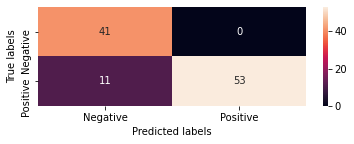

In [26]:
y_pred_svm_rbf_best =  best_svm_rbf.predict(X_test)
y_pred_proba_svm_rbf_best = best_svm_rbf.predict_proba(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm_rbf_best)
ax1 = plt.subplot(211)
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

In [27]:
print('For the test set:\n')
func.calc_stat(X_test,y_test,best_svm_rbf, flag = 'non_log') # calculate performance of test
print('\nFor the train set:\n')
func.calc_stat(X_train,y_train,best_svm_rbf,flag ='non_log') # calculate performance of train

For the test set:

Loss is 0.21. 
Accuracy is 0.90. 
F1 is 0.91. 
AUROC is 0.984

For the train set:

Loss is 0.01. 
Accuracy is 1.00. 
F1 is 1.00. 
AUROC is 1.000


In [28]:
C = [0.001, 0.01, 0.1, 1, 10, 100]
gamma  = [0.001, 0.01, 0.1, 1, 10, 100]
best_svm_poly = func.cv_kfold_svm(X_train,y_train,C=C,K=5,gamma=gamma, flag = 'poly')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END svm__C=0.001, svm__gamma=0.001, svm__kernel=poly; roc_auc: (train=0.975, test=0.994) total time=   0.0s
[CV 2/5] END svm__C=0.001, svm__gamma=0.001, svm__kernel=poly; roc_auc: (train=0.983, test=0.950) total time=   0.0s
[CV 3/5] END svm__C=0.001, svm__gamma=0.001, svm__kernel=poly; roc_auc: (train=0.974, test=0.962) total time=   0.0s
[CV 4/5] END svm__C=0.001, svm__gamma=0.001, svm__kernel=poly; roc_auc: (train=0.976, test=0.988) total time=   0.0s
[CV 5/5] END svm__C=0.001, svm__gamma=0.001, svm__kernel=poly; roc_auc: (train=0.978, test=0.952) total time=   0.0s
[CV 1/5] END svm__C=0.001, svm__gamma=0.01, svm__kernel=poly; roc_auc: (train=0.975, test=0.994) total time=   0.0s
[CV 2/5] END svm__C=0.001, svm__gamma=0.01, svm__kernel=poly; roc_auc: (train=0.983, test=0.950) total time=   0.0s
[CV 3/5] END svm__C=0.001, svm__gamma=0.01, svm__kernel=poly; roc_auc: (train=0.974, test=0.962) total time=   0.0s
[CV 4

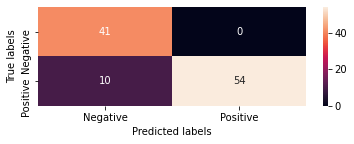

In [29]:
y_pred_svm_poly_best =  best_svm_poly.predict(X_test)
y_pred_proba_svm_poly_best = best_svm_poly.predict_proba(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm_poly_best)
ax1 = plt.subplot(211)
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

In [30]:
print('For the test set:\n')
func.calc_stat(X_test,y_test,best_svm_poly, flag = 'non_log') # calculate performance of test
print('\nFor the train set:\n')
func.calc_stat(X_train,y_train,best_svm_poly,flag ='non_log') # calculate performance of train

For the test set:

Loss is 0.19. 
Accuracy is 0.90. 
F1 is 0.92. 
AUROC is 0.992

For the train set:

Loss is 0.01. 
Accuracy is 1.00. 
F1 is 1.00. 
AUROC is 1.000


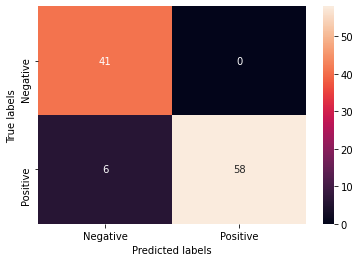

Accuracy is: 94.29%
F1 score is: 94.13%
AUC is:  99.16%


In [32]:
# from the hw1:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import roc_auc_score
clf = rfc(n_estimators=10)

X_train, X_test, y_train, y_test = train_test_split(data.drop(['Diagnosis'],axis=1), np.ravel(diag_state), test_size=0.2, random_state=10, stratify = np.ravel(diag_state) )
# X_train, X_test, y_train, y_test = train_test_split(X1, d["Diagnosis"], test_size=0.2, random_state=10, stratify =d["Diagnosis"] )
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba_test = clf.predict_proba(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
ax.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred))) + "%")
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred, average='macro'))) + "%")
print('AUC is:  ' + str("{0:.02f}".format(100*roc_auc_score(y_test, y_pred_proba_test[:, 1]))) + '%')

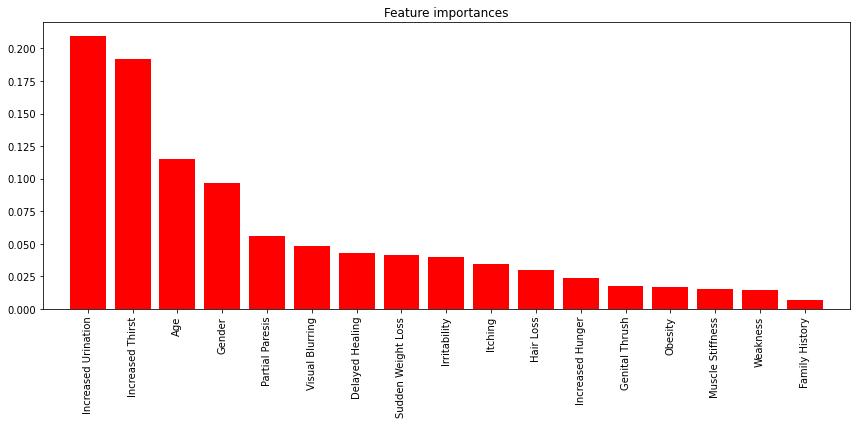

In [33]:
# Here we show the most important features (from the most important to less)
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", align="center")
o = np.zeros(len(orig_feat)).tolist()
for i,val in enumerate(indices):
    o[i] = orig_feat[val]
plt.xticks(range(X_train.shape[1]), o)
plt.xlim([-1, X_train.shape[1]])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

(523, 2)

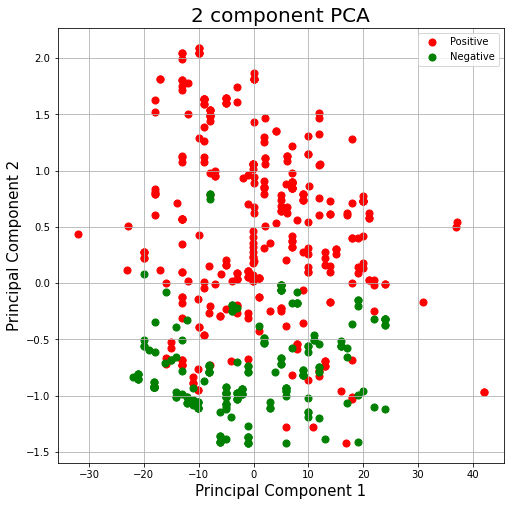

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data.drop(['Diagnosis'],axis=1))
transform_data = pca.transform(data.drop(['Diagnosis'],axis=1))
principalComponents = pca.fit_transform(data.drop(['Diagnosis'],axis=1))
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, data[['Diagnosis']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Positive','Negative'])
ax.grid()
principalComponents.shape

In [ ]:
from sklearn.pipeline import Pipeline
X_train, X_test, y_train, y_test = train_test_split(X2, d["Diagnosis"], test_size=0.2, random_state=42,stratify = d["Diagnosis"])
log_reg = LogisticRegression()
pca = PCA(n_components=2)

pipe_pca_logreg = Pipeline(steps=[('pca', pca), ('logistic', log_reg)])
pipe_pca_logreg.fit(X_train, y_train)
y_pred_pca = pipe_pca_logreg.predict(X_test)
func.calc_stat(X_test,y_test,pipe_pca_logreg, flag = 'log')


logreg = LogisticRegression(random_state=5,solver='saga', multi_class='ovr', max_iter=10000)
lmbda = np.array([0.01, 0.01, 1, 10, 100, 1000])
kf = SKFold(n_splits=5)
pipe_lin = Pipeline(steps=[('pca', pca),('logistic', logreg)])
clf = GridSearchCV(estimator=pipe_lin, param_grid={'logistic__C': 1/lmbda, 'logistic__penalty': ['l2', 'l1']},
                   scoring=['roc_auc'], cv=kf,
                   refit='roc_auc', verbose=3, return_train_score=True) # verbose bigger - more data we see, logistic__C - do logistiq regression with parameter C
clf.fit(X_train, y_train)
clf.best_params_


In [ ]:
from sklearn import svm
svm_lin = svm.SVC(probability=True,gamma='auto',kernel = 'linear')
pca = PCA(n_components=2)
pipe_pca_svm_lin = Pipeline(steps=[('pca', pca), ('svm', svm_lin)])
pipe_pca_svm_lin.fit(X_train, y_train)
y_pred_pca = pipe_pca_svm_lin.predict(X_test)
f.calc_stat(X_test,y_test,pipe_pca_svm_lin)

In [ ]:
svm_rbf = svm.SVC(probability=True,gamma='auto',kernel = 'rbf')
pca = PCA(n_components=2)
pipe_pca_svm_rbf = Pipeline(steps=[('pca', pca), ('svm', svm_rbf)])
pipe_pca_svm_rbf.fit(X_train, y_train)
y_pred_pca = pipe_pca_svm_rbf.predict(X_test)
f.calc_stat(X_test,y_test,pipe_pca_svm_rbf)

In [ ]:
svm_poly = svm.SVC(probability=True,gamma='auto',kernel = 'poly')
pca = PCA(n_components=2)
pipe_pca_svm_poly = Pipeline(steps=[('pca', pca), ('svm', svm_poly)])
pipe_pca_svm_poly.fit(X_train, y_train)
y_pred_pca = pipe_pca_svm_poly.predict(X_test)
f.calc_stat(X_test,y_test,pipe_pca_svm_poly)

In [ ]:
X3 = dataset.dropna()[['Increased Urination', 'Increased Thirst']]
X3n = pd.get_dummies(X3)
X_train, X_test, y_train, y_test = train_test_split(X3n, d['Diagnosis'], test_size=0.2, random_state=42,stratify = d['Diagnosis'])
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred_log_reg = log_reg.predict(X_test)
f.calc_stat(X_test,y_test,log_reg)

In [ ]:
svm_lin = svm.SVC(probability=True,gamma='auto',kernel = 'linear')
pipe_svm_lin = Pipeline(steps=[('svm', svm_lin)])
pipe_svm_lin.fit(X_train, y_train)
y_pred = pipe_svm_lin.predict(X_test)
f.calc_stat(X_test,y_test,pipe_svm_lin)

In [ ]:
svm_rbf = svm.SVC(probability=True,gamma='auto',kernel = 'rbf')
pipe_svm_rbf = Pipeline(steps=[ ('svm', svm_rbf)])
pipe_svm_rbf.fit(X_train, y_train)
y_pred = pipe_svm_rbf.predict(X_test)
f.calc_stat(X_test,y_test,pipe_svm_rbf)

In [ ]:
svm_poly = svm.SVC(probability=True,gamma='auto',kernel = 'poly')
pipe_svm_poly = Pipeline(steps=[('svm', svm_poly)])
pipe_svm_poly.fit(X_train, y_train)
y_pred = pipe_svm_poly.predict(X_test)
f.calc_stat(X_test,y_test,pipe_svm_poly)

# Theory Questions 

Q1: We think that performance is more important for us, because if we have unbalanced data we can get high accuracy but the other performances will be bad. For example if we have 3% pathology data samples and the classifier always returns healthy label we will get high accuracy (97%) but sensitivity, for example, will be low. 

Q2: If we chose just 2 features we have 2 options:
1) we choose the most correlated features and other not usefull for our classification we will get good performance for predicted labels, and it will be easy for computation

2) if we chose features with bad correlation (it means not usefull for classification) we will get a bad prediction results. But computation will be fast.

If we chose all the features, we have extra information that can be not useful for us and make computetions slower, require a large amount of system memory and will affect the performance. In other hand many features can lead to better performance, because we have more information that is usefull. 

Q3: We have very similar data, so it will be hard to find margin that maximize the distance between support vectors. Hence linear svm will be less usefull here. Logistic regression is based on probabilities so it we think that it will work better. In the question we have no information about number of examples and features, and the numbers will influence the model we will prefer. If we have small number of features and medium number of examples we will prefer to use non-linear SVM, in other cases we will prefer logistic regression. (We used information from https://medium.com/axum-labs/logistic-regression-vs-support-vector-machines-svm-c335610a3d16)

Q4:
SVM works well with unstructured and semi-structured data such as images and text, while logistic regression works well with already identified explanatory variables. The risk of overfitting is less in linear, whereas logistic regression can lead to overfitting easier. SVM is based on geometric properties of data, it tries to find the best margin that will maximize distance between support vectors. The main hyperparameter of linear SVM is C. The parameter regulates number of misclasified data points, because real data almost always is not ideally linear separable. If C is big number of misclassifications is low and margin is smaller than in the case when C is small. Logistic regression is based on statistical approaches. Its main hyperparameters are C, penalty and solver.  (https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167)